# Load Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#!pip install -U -q PyDrive

#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

# Laod Data

In [ ]:
#link = 'https://drive.google.com/open?id=1vMUTPkfZOv-m6lQbIFVH65VpNnWMj7IN' 
#fluff, id = link.split('=')
#file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
#file.GetContentFile('TVdata.txt')  

In [2]:
tv = pd.read_csv('TVdata.txt')
print(tv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 16 columns):
video_id                         4228 non-null object
cvt_per_day                      4228 non-null float64
weighted_categorical_position    4227 non-null float64
weighted_horizontal_poition      4227 non-null float64
import_id                        4227 non-null object
release_year                     4227 non-null object
genres                           4227 non-null object
imdb_votes                       4226 non-null float64
budget                           4226 non-null float64
boxoffice                        4226 non-null float64
imdb_rating                      4225 non-null float64
duration_in_mins                 4225 non-null float64
metacritic_score                 4225 non-null float64
awards                           4225 non-null object
mpaa                             4225 non-null object
star_category                    4224 non-null float64
dtypes: float64(10)

# Part 1: Explore Data

## Check Duplication

In [4]:
if sum(tv.duplicated('video_id', keep = False)) == 0:
  print('There is no duplicated entry (video_id based).')
else:
  print('Check the duplication.')

There is no duplicated entry (video_id based).


In [8]:
len(tv['video_id'].unique())

4228

## Feature Overview

There are total 16 columns including both feautures and outcome variable, among them there are total 9 numerical features (excluding the video_id and release_year) and 4 categorical features in the dataset and the outcome variable is a numerical variable.

## Understand the numerical features

In [5]:
print(tv.isnull().sum()) # the number of rows with NaN for each column
print(len(tv))
tv[tv['imdb_rating'].isnull()]

video_id                         0
cvt_per_day                      0
weighted_categorical_position    1
weighted_horizontal_poition      1
import_id                        1
release_year                     1
genres                           1
imdb_votes                       2
budget                           2
boxoffice                        2
imdb_rating                      3
duration_in_mins                 3
metacritic_score                 3
awards                           3
mpaa                             3
star_category                    4
dtype: int64
4228


,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
1867,305023,1505.742558,14.00000,28.0,mgm,1963,"Comedy,Sci-Fi,Fantasy",8215.0,200000.0,8551.0,NaN,NaN,NaN,NaN,NaN,NaN
1868,228,6.700000,85.85685,57.0,other award,G,2.5249999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3916,d,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tv = tv.dropna(axis = 0)
print(len(tv))

4224


Notice that there aren't any explicit missing value such as NA or NaN in the dataset. So I further looked at some percentiles of each numerical features here. 

In [7]:
print(((tv == 0).sum()/len(tv)).map('{:.2%}'.format))
tv.drop(['video_id', 'release_year', 'cvt_per_day'], axis=1).describe(percentiles = [.1, .25, .5, .75, .95])

video_id                          0.00%
cvt_per_day                       0.00%
weighted_categorical_position     0.00%
weighted_horizontal_poition       0.00%
import_id                         0.00%
release_year                      0.00%
genres                            0.00%
imdb_votes                        8.14%
budget                           58.10%
boxoffice                        75.59%
imdb_rating                       8.14%
duration_in_mins                  0.00%
metacritic_score                 71.28%
awards                            0.00%
mpaa                              0.00%
star_category                    43.68%
dtype: object


,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4224.000000,4224.000000,4224.000000,4.224000e+03,4.224000e+03,4224.000000,4224.000000,4224.000000,4224.000000
mean,7.781960,28.105350,6464.035275,2.151681e+06,2.535515e+06,5.256037,89.559113,15.967803,0.954505
std,6.134613,11.865955,31603.320608,7.178174e+06,8.244856e+06,2.122680,21.090651,26.202664,0.954853
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
10%,3.000000,13.000000,8.000000,0.000000e+00,0.000000e+00,2.300000,62.386413,0.000000,0.000000
25%,4.000000,20.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.605137,0.000000,0.000000
50%,6.000000,28.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.732208,0.000000,1.000000
75%,9.000000,36.000000,3047.000000,1.500000e+06,0.000000e+00,6.800000,99.505492,41.000000,1.666667
95%,22.000000,48.000000,26206.900000,1.200000e+07,8.551228e+06,7.800000,119.132043,65.000000,2.598333
max,41.000000,70.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


Notice that the minimum value for imdb_votes, budget, boxoffice, imdb_rating, metacritic_score and star_category are all 0 and even 10th percentile and 25th percentile of 0 for the budget and boxoffice. It's weird like how can a movie with 0 budge and how can a movie after releasing with no boxoffice at all. 4 features have over 25% of missing data: budget, boxoffice, metacritic_score, star_category. 2 features have less than 10% of missing data: imdb_votes, imdb_rating. Basically, you can not tell which 0 are informative, which are not like in ratings. We can only randomly guess.

1500000.0
budget    5.134858e+06
dtype: float64


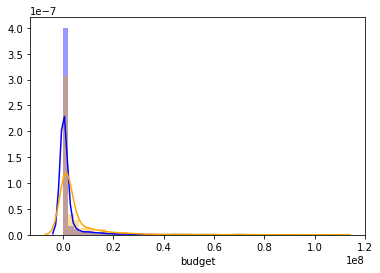

In [8]:
sns.distplot(tv['budget'], color = 'blue')
sns.distplot(tv.loc[tv['budget'] != 0, ['budget']], color = 'orange')
print(np.median(tv.loc[tv['budget'] != 0, ['budget']]))
print(np.mean(tv.loc[tv['budget'] != 0, ['budget']]))

8551228.0
boxoffice    1.038799e+07
dtype: float64


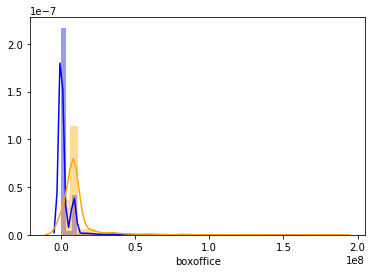

In [9]:
sns.distplot(tv['boxoffice'], color = 'blue')
sns.distplot(tv.loc[tv['boxoffice'] != 0, ['boxoffice']], color = 'orange')
print(np.median(tv.loc[tv['boxoffice'] != 0, ['boxoffice']]))
print(np.mean(tv.loc[tv['boxoffice'] != 0, ['boxoffice']]))

673.0
imdb_votes    7037.135309
dtype: float64


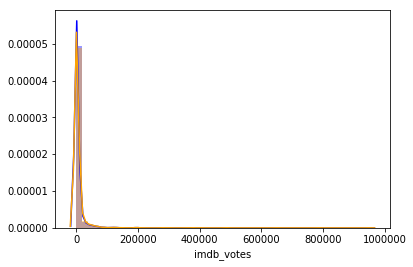

In [10]:
# imdb_votes only has 2% 0. 
sns.distplot(tv['imdb_votes'], color = 'blue')
sns.distplot(tv.loc[tv['imdb_votes'] != 0, ['imdb_votes']], color = 'orange')
print(np.median(tv.loc[tv['imdb_votes'] != 0, ['imdb_votes']]))
print(np.mean(tv.loc[tv['imdb_votes'] != 0, ['imdb_votes']]))

5.900000095367432
imdb_rating    5.722036
dtype: float64


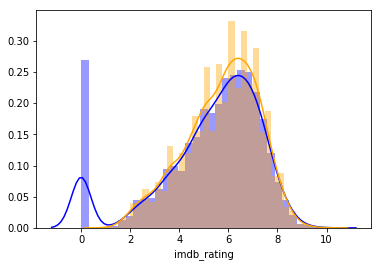

In [11]:
sns.distplot(tv['imdb_rating'], color = 'blue')
sns.distplot(tv.loc[tv['imdb_rating'] != 0, ['imdb_rating']], color = 'orange')
print(np.median(tv.loc[tv['imdb_rating'] != 0, ['imdb_rating']]))
print(np.mean(tv.loc[tv['imdb_rating'] != 0, ['imdb_rating']]))

57.0
metacritic_score    55.604287
dtype: float64


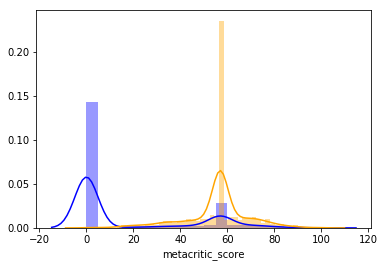

In [12]:
sns.distplot(tv['metacritic_score'], color = 'blue')
sns.distplot(tv.loc[tv['metacritic_score'] != 0, ['metacritic_score']], color = 'orange')
print(np.median(tv.loc[tv['metacritic_score'] != 0, ['metacritic_score']]))
print(np.mean(tv.loc[tv['metacritic_score'] != 0, ['metacritic_score']]))

1.6666666666666667
star_category    1.694758
dtype: float64


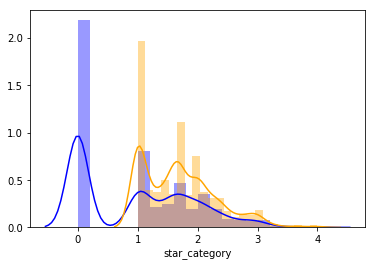

In [13]:
sns.distplot(tv['star_category'], color = 'blue')
sns.distplot(tv.loc[tv['star_category'] != 0, ['star_category']], color = 'orange')
print(np.median(tv.loc[tv['star_category'] != 0, ['star_category']]))
print(np.mean(tv.loc[tv['star_category'] != 0, ['star_category']]))

From the graph above, we can see that budget, boxoffice and imdb_votes have very right skewed distribution after omitting the 0 values, so I chose to use the median to fill the missing value, which is not very sensitive to the skewness data. For other features imdb_ratings, metacritic_score and star_category, I chose to use mean to fill the missing value. 

### Correlation

Text(32.09374999999999, 0.5, 'Numrical Features')

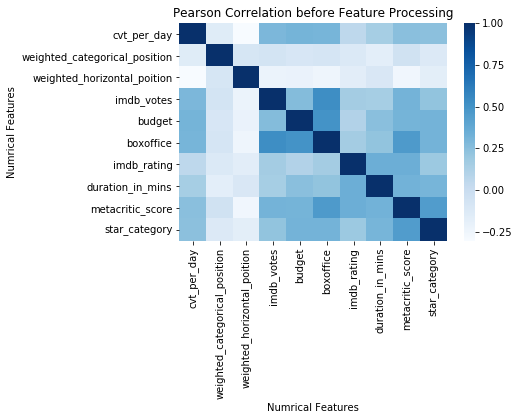

In [14]:
tv_corr = tv.select_dtypes(['number']).corr()
sns.heatmap(tv_corr, cmap="Blues")
plt.title('Pearson Correlation before Feature Processing')
plt.xlabel('Numrical Features')
plt.ylabel('Numrical Features')

It makes sense that location in the website does not have a strong relationship between the movie itself like release_year, budget and so on.  

## Understand the Categorical Features

### Simple Categorical Features (import_id, mpaa, awards)

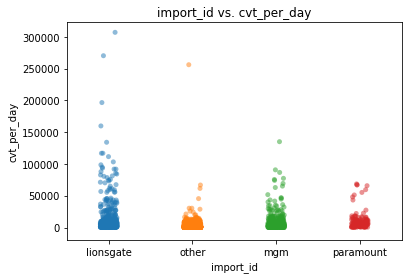

       index  import_id
0      other       2962
1  lionsgate        677
2        mgm        444
3  paramount        141


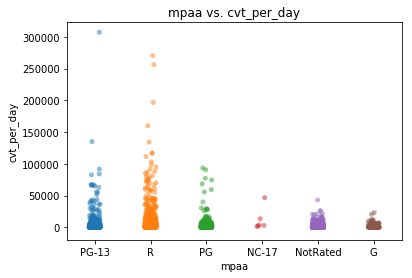

      index  mpaa
0  NotRated  2157
1         R  1158
2     PG-13   426
3        PG   353
4         G   124
5     NC-17     6


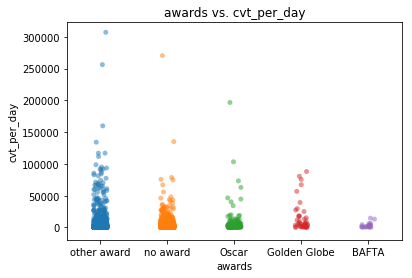

          index  awards
0      no award    2568
1   other award    1452
2         Oscar     141
3  Golden Globe      44
4         BAFTA      19


In [15]:
sns.stripplot(x = 'import_id', y = 'cvt_per_day', data = tv, jitter = True, alpha = 0.5)
plt.title('import_id vs. cvt_per_day')
plt.show()
print(tv['import_id'].value_counts().reset_index())

sns.stripplot(x = 'mpaa', y = 'cvt_per_day', data = tv, jitter = True, alpha = 0.5)
plt.title('mpaa vs. cvt_per_day')
plt.show()
print(tv['mpaa'].value_counts().reset_index())

sns.stripplot(x = 'awards', y = 'cvt_per_day', data = tv, jitter = True, alpha = 0.5)
plt.title('awards vs. cvt_per_day')
plt.show()
print(tv['awards'].value_counts().reset_index())

### Distribution of splited genres
https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

Text(0, 0.5, 'Count')

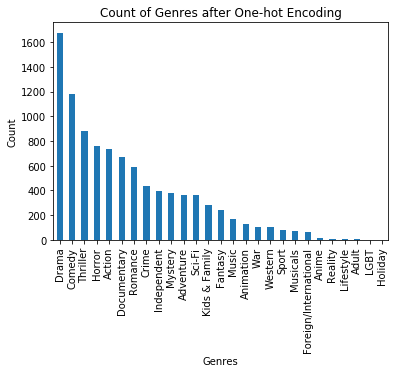

In [16]:
tv_genre_dummy = tv['genres'].str.get_dummies(sep = ',').astype(np.int64)
total_genre = tv_genre_dummy.sum()
total_genre.sort_values(ascending=False).plot.bar()
plt.title('Count of Genres after One-hot Encoding')
plt.xlabel('Genres')
plt.ylabel('Count')

In [17]:
tv_genre_dummy.columns

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Foreign/International', 'Holiday',
       'Horror', 'Independent', 'Kids & Family', 'LGBT', 'Lifestyle', 'Music',
       'Musicals', 'Mystery', 'Reality', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

6 genres including Anime, Reality, Lifestyle, Adult, LGBT, Holiday have low frequencies. Therefore, during feature processing, they will be grouped together as: 'Misc_gen' in the feature 'genres'. Some videos belongs to more than 1 genre, the genre of each video is splited, this would help emphasize the effect of each individual genre.
直接one hot encoding绝对会overfitting

### Distribution of release_year
(时间是个比较敏感的variable 最好看一下)

The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range.

There are total 97 distinct year from 1916 to 2017. And in order to split them more evenly, we cut the range based on the percentile in the later feature engineering part.

In [18]:
print(len(tv['release_year'].unique()))
np.sort(tv['release_year'].unique())

97


array(['1916', '1920', '1921', '1922', '1923', '1925', '1926', '1927',
       '1928', '1930', '1931', '1932', '1933', '1934', '1935', '1936',
       '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944',
       '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'], dtype=object)

count    4224.000000
mean     2001.062737
std        17.490056
min      1916.000000
10%      1974.000000
20%      1991.000000
30%      2001.000000
40%      2006.000000
50%      2008.000000
60%      2010.000000
70%      2012.000000
80%      2013.000000
90%      2014.000000
max      2017.000000
Name: release_year, dtype: float64


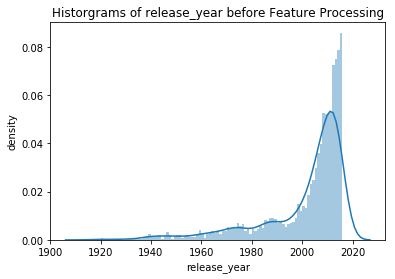

In [19]:
tv['release_year'] = pd.to_numeric(tv['release_year'])
sns.distplot(tv['release_year'], bins = range(1910, 2017, 1))
plt.title('Historgrams of release_year before Feature Processing')
plt.xlabel('release_year')
plt.ylabel('density')

print(tv['release_year'].describe(percentiles = [.1, .2, .3, .4,.5, .6, .7, .8, .9]))

# Part 2: Feature Processing

## One-Hot Encoding

There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

These three features: import_id, mpaa, awards have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.

The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [23]:
# Convert 3 Categorical variables into dummy variables, this step automatically drop the original features

#d_import_id = pd.get_dummies(tv['import_id']).astype(np.int64)
#d_mpaa = pd.get_dummies(tv['mpaa']).astype(np.int64)
#d_awards = pd.get_dummies(tv['awards']).astype(np.int64)

tv_easy_dummy = ["import_id", "mpaa", "awards"]
tv_tmp = pd.get_dummies(tv, prefix_sep = "_",
                              columns = tv_easy_dummy)


In [24]:
tv_genre_dummy = tv['genres'].str.get_dummies(sep = ',').astype(np.int64)
tv_genre_dummy['other'] = tv_genre_dummy['Anime']|tv_genre_dummy['Reality']|tv_genre_dummy['Lifestyle']|tv_genre_dummy['Adult']|tv_genre_dummy['LGBT']|tv_genre_dummy['Holiday']
tv_genre_dummy.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [25]:
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006', '2006-2008', '2008-2010', '2010-2012',' 2012-2013',
              '2013-2014', '2014-2017']

#bins [1, 2, 3, 4] indicate (1,2], (2,3], (3,4].
year_bin = pd.cut(tv['release_year'], bin_year, labels=year_range)
tv_year_dummy = pd.get_dummies(year_bin).astype(np.int64)

In [26]:
new_tv = pd.concat([tv_tmp, tv_genre_dummy, tv_year_dummy], axis = 1).drop(['genres', 'release_year'], axis=1)
print(new_tv.shape)
print(new_tv.head())

(4224, 58)
  video_id    cvt_per_day  weighted_categorical_position  \
0   385504  307127.605608                            1.0   
1   300175  270338.426375                            1.0   
2   361899  256165.867446                            1.0   
3   308314  196622.720996                            3.0   
4   307201  159841.652064                            1.0   

   weighted_horizontal_poition  imdb_votes      budget   boxoffice  \
0                          3.0     69614.0  15000000.0  42930462.0   
1                          3.0     46705.0  15000000.0   3301046.0   
2                          3.0    197596.0  26000000.0  37397291.0   
3                          4.0    356339.0  15000000.0  15700000.0   
4                          3.0     46720.0  27220000.0   8551228.0   

   imdb_rating  duration_in_mins  metacritic_score  ...  1916-1974  1974-1991  \
0          6.5        112.301017              51.0  ...          0          0   
1          6.5         94.983250             

Feature space holds 4226 observations and 58 features in total.

## Handling of Missing Data

In [27]:
new_tv_miss = new_tv.copy()
# mark zero values as NaN
new_tv_miss[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = new_tv_miss[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)

# count the number of NaN values in each column
print(new_tv_miss.isnull().sum())

#count the number videos who have at least one missing data 
#isnull.any(axis=1) returns true if one of the value in this row is na
print('videos having at least one null: ', new_tv_miss.isnull().any(axis=1).sum())

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3193
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3011
star_category                    1845
import_id_lionsgate                 0
import_id_mgm                       0
import_id_other                     0
import_id_paramount                 0
mpaa_G                              0
mpaa_NC-17                          0
mpaa_NotRated                       0
mpaa_PG                             0
mpaa_PG-13                          0
mpaa_R                              0
awards_BAFTA                        0
awards_Golden Globe                 0
awards_Oscar                        0
awards_no award                     0
awards_other award                  0
Action      

### Split the data (train, test)

In [28]:
# The 15% test data will kept aside, they won't be seen by the models until final test/comparison.
from sklearn.model_selection import train_test_split

tv_train_init, tv_test_init = train_test_split(new_tv_miss, test_size = 0.15, random_state = 3)

### Using median

In [157]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy = 'median')
imp_mean.fit(tv_train_init)
tv_train_fill = pd.DataFrame(imp_mean.transform(tv_train_init), columns = tv_train_init.columns)
tv_test_fill = pd.DataFrame(imp_mean.transform(tv_test_init), columns = tv_test_init.columns)

In [148]:
print(tv_train_fill.isnull().sum())
print(tv_test_fill.isnull().sum())

video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
star_category                    0
import_id_lionsgate              0
import_id_mgm                    0
import_id_other                  0
import_id_paramount              0
mpaa_G                           0
mpaa_NC-17                       0
mpaa_NotRated                    0
mpaa_PG                          0
mpaa_PG-13                       0
mpaa_R                           0
awards_BAFTA                     0
awards_Golden Globe              0
awards_Oscar                     0
awards_no award                  0
awards_other award               0
Action                           0
Adult                            0
Adventure           

### Using KNN Regression

In [35]:
print(tv_train_fillknn.isnull().sum())

video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
star_category                    0
import_id_lionsgate              0
import_id_mgm                    0
import_id_other                  0
import_id_paramount              0
mpaa_G                           0
mpaa_NC-17                       0
mpaa_NotRated                    0
mpaa_PG                          0
mpaa_PG-13                       0
mpaa_R                           0
awards_BAFTA                     0
awards_Golden Globe              0
awards_Oscar                     0
awards_no award                  0
awards_other award               0
Action                           0
Adventure                        0
Animation           

In [30]:
tv_train_tmp = tv_train_init.copy()
tv_test_tmp = tv_test_init.copy()
fill_median_lst = ['imdb_votes', 'imdb_rating']
tv_train_tmp = tv_train_tmp.apply(lambda x: x.fillna(x.median()) if x.name in fill_median_lst else x)
tv_test_tmp = tv_test_tmp.apply(lambda x: x.fillna(tv_train_tmp[x.name].median()) if x.name in fill_median_lst else x)

In [33]:
from sklearn.neighbors import KNeighborsRegressor
fill_knn_lst = ['budget', 'boxoffice', 'metacritic_score', 'star_category']
idx_with_nan = tv_train_tmp.isnull().any(axis = 1)
#fill_test_dict = {}
#fill_train_dict = {}
tv_train_fillknn = tv_train_tmp.copy()
tv_test_fillknn = tv_test_tmp.copy()

for ind, col in enumerate(fill_knn_lst):
    X = tv_train_tmp.drop(columns = ['video_id', 'cvt_per_day'])
    X = X.drop(columns = [x for i,x in enumerate(fill_knn_lst) if i != ind])
    idx_with_nan = X.isnull().any(axis=1)
    X_with_nan = X[idx_with_nan]
    X_no_nan = X[-idx_with_nan]
    
    X_test = tv_test_tmp.drop(columns = ['video_id', 'cvt_per_day'])
    X_test = X_test.drop(columns = [x for i,x in enumerate(fill_knn_lst) if i != ind])
    idx_test_with_nan = X_test.isnull().any(axis=1)
    X_test_with_nan = X_test[idx_test_with_nan]
    
    clf = KNeighborsRegressor(5, weights='distance')
    clf.fit(X_no_nan.drop(columns = col), X_no_nan[col])
    
    x_imputed = clf.predict(X_with_nan.drop(columns = col))
    x_test_imputed = clf.predict(X_test_with_nan.drop(columns = col))
    
    tv_train_fillknn.loc[idx_with_nan, col] = x_imputed.reshape(-1, 1)
    tv_test_fillknn.loc[idx_test_with_nan, col] = x_test_imputed.reshape(-1, 1)

## Feature Scaling

The impact of different scaling methods on the model performance is small. In the following model training and selections, the standard scaling (sc) data is used. 

归一化（min max） 标准化（mean sd to get Gaussian）

In [ ]:
#Standard scaling
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']

from sklearn import preprocessing

tv_train = tv_train_fill.copy()
tv_test = tv_test_fill.copy()

sc_scale = preprocessing.StandardScaler().fit(tv_train_fill[scale_lst])
tv_train[scale_lst] = sc_scale.transform(tv_train_fill[scale_lst])
tv_test[scale_lst] = sc_scale.transform(tv_test_fill[scale_lst])

tv_test.head(n = 10)

In [36]:
#Standard scaling knn
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']

from sklearn import preprocessing

tv_train = tv_train_fillknn.copy()
tv_test = tv_test_fillknn.copy()

sc_scale = preprocessing.StandardScaler().fit(tv_train_fillknn[scale_lst])
tv_train[scale_lst] = sc_scale.transform(tv_train_fillknn[scale_lst])
tv_test[scale_lst] = sc_scale.transform(tv_test_fillknn[scale_lst])

tv_test.head(n = 10)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
3692,387304,175.674158,2.753335,-1.273336,-0.039973,-0.222060,0.623301,1.372316,0.560277,0.284383,...,1,0,0,0,0,0,0,0,0,0
198,307756,15525.886037,-0.454451,-1.611042,-0.011181,-0.222060,0.623301,0.395851,-0.064455,0.284383,...,0,0,1,0,0,0,0,0,0,0
2593,307212,728.070473,-0.133673,1.850446,0.170482,-0.249599,-0.291775,1.023579,0.269331,0.284383,...,0,0,1,0,0,0,0,0,0,0
202,393894,15145.267596,-0.133673,-1.442189,1.517560,-0.222060,0.623301,1.093326,1.011458,1.360675,...,0,1,0,0,0,0,0,0,0,0
4044,341534,78.540809,-0.775230,0.161916,-0.210763,-0.411390,-0.333179,0.953831,-0.424586,-1.027997,...,0,0,0,0,0,0,0,0,0,1
1905,320084,1452.372137,-0.294062,0.330769,-0.209026,-0.361834,-0.360784,-0.092382,0.227467,-1.542858,...,0,0,1,0,0,0,0,0,0,0
1053,326898,3360.930062,-0.775230,0.330769,-0.196061,0.511574,-0.343886,0.674841,0.074948,0.968751,...,0,0,1,0,0,0,0,0,0,0
3976,281667,95.894983,-0.614841,-0.513497,-0.211181,-0.390257,-0.343493,0.465599,-1.571481,-0.756320,...,0,0,0,0,0,0,0,1,0,0
2244,367685,1048.932964,-0.294062,1.343887,-0.182292,-0.271205,-0.356016,-2.045312,0.048642,-0.850065,...,0,0,0,0,0,0,1,0,0,0
1351,374424,2438.380055,1.149442,-0.597923,-0.211052,-0.347137,-0.335222,0.465599,0.112026,-0.782921,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# MinMax scaling
#new_tv_mm = new_tv_fill.copy()
#mm_scale = preprocessing.MinMaxScaler().fit(new_tv_mm[scale_lst])
#new_tv_mm[scale_lst] = mm_scale.transform(new_tv_mm[scale_lst])

In [ ]:
# Robust scaling
#new_tv_rs = new_tv_fill.copy()
#rs_scale = preprocessing.RobustScaler().fit(new_tv_rs[scale_lst])
#new_tv_rs[scale_lst] = rs_scale.transform(new_tv_rs[scale_lst])

## Final Plot

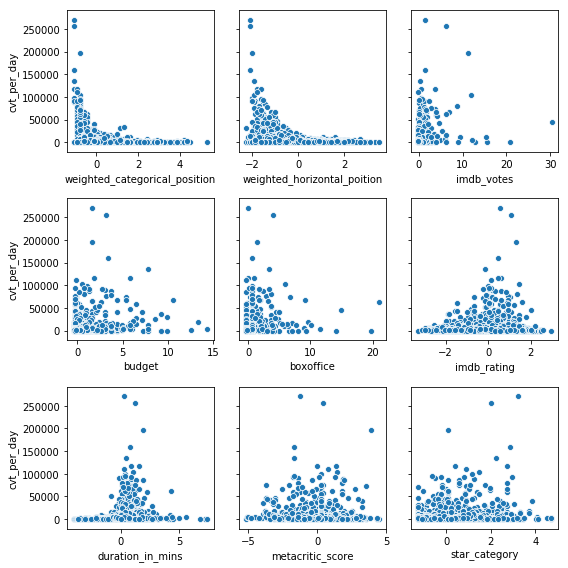

In [37]:
tv_plot_lst = ['weighted_categorical_position',
       'weighted_horizontal_poition', 'imdb_votes', 'budget', 'boxoffice',
       'imdb_rating', 'duration_in_mins', 'metacritic_score', 'star_category']
index = 0

fig, axes = plt.subplots(3,3, figsize=(8,8), sharey = True)
axes = axes.flatten()
for ax in axes:
    sns.scatterplot(tv_train[tv_plot_lst[index]], tv_train['cvt_per_day'], ax=ax)
    index += 1

plt.tight_layout()  
plt.show()

# Part 3: Model Training

## Feature and Outcome Split

In [38]:
tv_train_x = tv_train.drop(['video_id', 'cvt_per_day'], axis = 1)
tv_test_x = tv_test.drop(['video_id', 'cvt_per_day'], axis = 1)
tv_train_y = tv_train['cvt_per_day']
tv_test_y = tv_test['cvt_per_day']

## Linear Model

All the features are linear

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#sorted(sklearn.metrics.SCORERS.keys())

### Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(tv_train_x, tv_train_y)
lr_pred = lr.predict(tv_test_x)
print('Negative Mean Squared Error:', -mean_squared_error(tv_test_y, lr_pred))  

Negative Mean Squared Error: -208139910.20916826


### Polynomial Regression (why so slow?)

In [41]:
#poly = PolynomialFeatures(4)
#pr_train_xp = poly.fit_transform(tv_train_x)
#pr_test_xp = poly.fit_transform(tv_test_x)

#pr = LinearRegression()
#pr.fit(pr_train_xp, tv_train_y)
#pr_pred = pr.predict(pr_test_xp)
#print('Negative Mean Squared Error:', -mean_squared_error(tv_test_y, pr_pred))  

### Ridge with Linear Regression

In [46]:
ridge = Ridge(random_state = 100)
param = {'alpha': np.logspace(-10, 3, num = 150)}
#param = {'alpha' : np.linspace(10**(-2), 10**(2), 100)}
ridge_grid = GridSearchCV(ridge, param, scoring = 'neg_mean_squared_error', cv= 5)
ridge_grid.fit(tv_train_x, tv_train_y)

ridge_result = ridge_grid.cv_results_

print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

{'alpha': 134.12717530678955}
-114660514.0337854


Text(0, 0.5, 'Negative MSE for Validation')

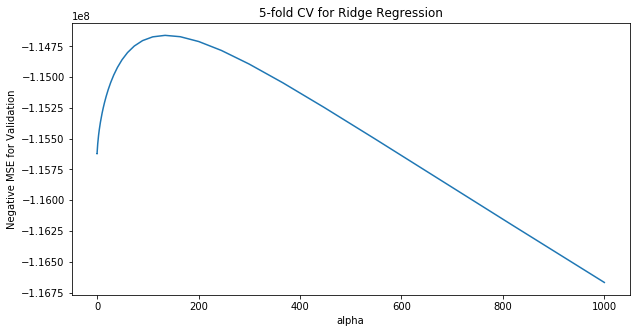

In [47]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(np.logspace (-10, 3, num = 150), ridge_result['mean_test_score'])
plt.title('5-fold CV for Ridge Regression')
plt.xlabel('alpha')
plt.ylabel('Negative MSE for Validation')

### Lasso with Linear Regression

In [48]:
lasso = Lasso(max_iter = 5000, random_state = 100)
param = {'alpha': np.logspace (-0.3, 2.5, num = 150)}
#param = {'alpha' : np.linspace(10**(-2), 10**(2), 100)}
lasso_grid = GridSearchCV(lasso, param, scoring = 'neg_mean_squared_error', cv = 5)
lasso_grid.fit(tv_train_x, tv_train_y)

lasso_result = lasso_grid.cv_results_

print(lasso_grid.best_params_)
print(lasso_grid.best_score_)

{'alpha': 39.62657866072022}
-115363544.52033062


Text(0, 0.5, 'Negative MSE for Validation')

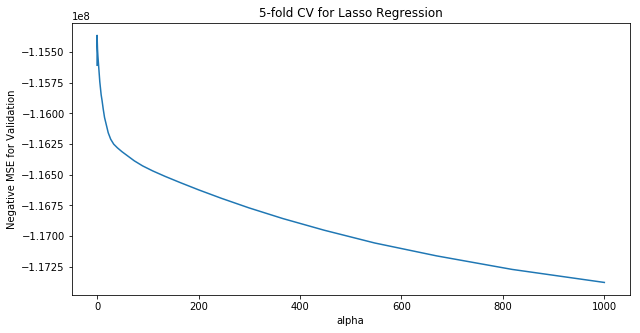

In [45]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(np.logspace (-10, 3, num = 150), lasso_result['mean_test_score'])
plt.title('5-fold CV for Lasso Regression')
plt.xlabel('alpha')
plt.ylabel('Negative MSE for Validation')

## Non-Linear Model

### Random Forest

In [49]:
param_grid = {
                 'n_estimators': [int(x) for x in np.linspace(start = 55, stop = 65, num = 65)],
                 'max_depth': [int(x) for x in np.linspace(start = 15, stop = 25, num = 10)]
             }
rf = RandomForestRegressor(random_state = 100, max_features = 'sqrt')
grid_rf = GridSearchCV(rf, param_grid, scoring = 'neg_mean_squared_error', cv = 5)
grid_rf.fit(tv_train_x, tv_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75], 'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 20, 'n_estimators': 56}
-81066195.53575033


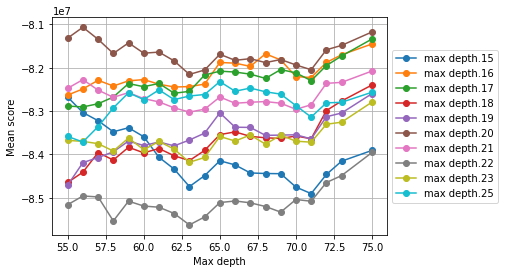

In [51]:
# plot the effect of different number of trees and maximum tree-depth druing cross validation 
scores = grid_rf.cv_results_['mean_test_score']

n_est = [int(x) for x in np.linspace(start = 55, stop = 75, num = 75-55)]
m_depth=[int(x) for x in np.linspace(start = 15, stop = 25, num = 10)]

scores = np.array(scores).reshape(len(m_depth), len(n_est))
fig = plt.figure()
ax = plt.subplot(111)

for ind, i in enumerate(m_depth):
    plt.plot(n_est, scores[ind], '-o', label='max depth.' + str(i),)
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean score')
plt.xlabel('Max depth')
plt.grid(True)
plt.show()
# savefig('rf_1')

In [106]:
rf_best = RandomForestRegressor(random_state = 100, max_features = 'sqrt', max_depth = 20, n_estimators = 56)
rf_best.fit(tv_train_x, tv_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

### Gradient Boosting

In [54]:
#Defualt Gradient Boost
gbm0 = GradientBoostingRegressor(random_state = 100)
gbm0.fit(tv_train_x, tv_train_y)
gbm0_pred = gbm0.predict(tv_test_x)
print('Default Gradient Boosting MSE:', mean_squared_error(tv_test_y, gbm0_pred))  

Default Gradient Boosting MSE: 124605745.06431982


In [96]:
param_test1 = {'n_estimators': range(150, 251, 10),  
               'max_depth': range(3,14,2)}
gbm2 = GradientBoostingRegressor(learning_rate = 0.1, max_features = 'sqrt', random_state = 100)
#min_samples_split = 300, min_samples_leaf = 20, max_depth = 8, 
gsearch1 = GridSearchCV(gbm2, param_grid = param_test1, scoring = 'neg_mean_squared_error', iid = False,cv = 5)
gsearch1.fit(tv_train_x, tv_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sam...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_estimators': range(150, 251, 10), 'max_depth': range(3, 14, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [97]:
print(gsearch1.best_params_, gsearch1.best_score_)
gsearch1_res = gsearch1.cv_results_
gsearch1_res['mean_test_score']

{'max_depth': 11, 'n_estimators': 210} -76902967.69546613


array([-81201071.91544639, -80992367.10541423, -80707790.11051339,
       -80380140.8396689 , -80280947.75682083, -79953463.2217408 ,
       -79935524.93685558, -79966369.66641408, -79862129.88871172,
       -79609053.447915  , -79418358.1563868 , -83816738.84756303,
       -83877816.16400687, -83829162.17857473, -83619633.3151848 ,
       -83615850.7098097 , -83580503.25999558, -83599874.70253967,
       -83677513.21815921, -83817983.76996543, -83734875.03330627,
       -83748297.71099168, -84553062.64677614, -84509530.35373566,
       -84479705.4518534 , -84453392.0467164 , -84397780.92597632,
       -84395287.91614887, -84362638.87924404, -84338000.96520913,
       -84339417.20350204, -84315575.05355054, -84284991.94580477,
       -83102978.70862982, -83094653.17161945, -83107056.91382982,
       -83099817.31056653, -83082133.6642966 , -83081538.6002895 ,
       -83072979.64833483, -83068334.01687261, -83072023.39071676,
       -83065074.75886291, -83061339.7611527 , -76906238.78627

In [102]:
param_test2 = {'min_samples_split':range(800,1500,200), 'min_samples_leaf':range(100,201,10)}
gbm3 = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 210, max_depth = 11, random_state = 100)
gsearch2 = GridSearchCV(gbm3, param_grid = param_test2, scoring = 'neg_mean_squared_error',iid = False, cv = 5)
gsearch2.fit(tv_train_x, tv_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=11, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samp...e=100, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'min_samples_split': range(800, 1500, 200), 'min_samples_leaf': range(100, 201, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [103]:
gsearch2.best_params_, gsearch2.best_score_

({'min_samples_leaf': 110, 'min_samples_split': 1000}, -82891986.5423151)

# Part 4 Model Evaluation

## Linea Regression Test

In [113]:
lr = LinearRegression()
lr.fit(tv_train_x, tv_train_y)
lr_pred = lr.predict(tv_test_x)
lr_MSE = mean_squared_error(tv_test_y, lr_pred)
print('Linear Regression MSE:', lr_MSE)  

Linear Regression MSE: 208139910.20916826


## Ridge Regression Test

In [114]:
ridge.set_params(alpha = list(ridge_grid.best_params_.values()))
ridge.fit(tv_train_x, tv_train_y)
ridge_pred = ridge.predict(tv_test_x)
ridge_MSE = mean_squared_error(tv_test_y, ridge_pred)
print('Ridge Regression MSE:', ridge_MSE)

Ridge Regression MSE: 209532128.6755044


## Lasso Regression Test

In [115]:
lasso.set_params(alpha = list(lasso_grid.best_params_.values()))
lasso.fit(tv_train_x, tv_train_y)
lasso_pred = lasso.predict(tv_test_x)
lasso_MSE = mean_squared_error(tv_test_y, lasso_pred)
print('Lasso Regression MSE:', lasso_MSE)

Lasso Regression MSE: 209237574.76937968


## Random Forest Test

In [116]:
rf_best = RandomForestRegressor(random_state = 100, max_features = 'sqrt', max_depth = 20, n_estimators = 56)
rf_best.fit(tv_train_x, tv_train_y)
rf_pred = rf_best.predict(tv_test_x)
rf_MSE = mean_squared_error(tv_test_y, rf_pred)
print('Ridge Regression MSE:', rf_MSE)

Ridge Regression MSE: 108952421.76448192


## Gradient Boosting Test

In [117]:
gb_best = GradientBoostingRegressor(random_state = 100, learning_rate = 0.1, 
                                    n_estimators = 210, max_depth = 11, 
                                    min_samples_leaf = 110, min_samples_split = 1000)
gb_best.fit(tv_train_x, tv_train_y)
gb_pred = gb_best.predict(tv_test_x)
gb_MSE = mean_squared_error(tv_test_y, gb_pred)
print('Gradient Boosting MSE:', gb_MSE)

Gradient Boosting MSE: 136208456.69935074


## Comparison

No handles with labels found to put in legend.


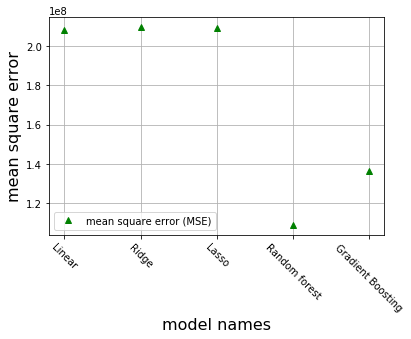

In [120]:
MSE_lst =  [lr_MSE, ridge_MSE, lasso_MSE, rf_MSE, gb_MSE]
model_lst = ['Linear','Ridge', 'Lasso', 'Random forest', 'Gradient Boosting']

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(loc = 9)
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.xticks(rotation = -45)
plt.ylabel('mean square error', fontsize =16)
plt.title("Model Compari")
plt.grid(True)
plt.show()

# Best model with Best hyper-parameter

## Feature Importance

Feature importance ranking:
1. feature 1 weighted_categorical_position (0.145157)
2. feature 0 weighted_horizontal_poition (0.118505)
3. feature 2 imdb_votes (0.112516)
4. feature 4 budget (0.063035)
5. feature 3 boxoffice (0.062768)
6. feature 7 imdb_rating (0.059054)
7. feature 8 duration_in_mins (0.043807)
8. feature 6 metacritic_score (0.041026)
9. feature 9 star_category (0.039705)
10. feature 5 import_id_lionsgate (0.038357)
11. feature 53 import_id_mgm (0.033724)
12. feature 11 import_id_other (0.027471)
13. feature 42 import_id_paramount (0.016106)
14. feature 10 mpaa_G (0.014201)
15. feature 28 mpaa_NC-17 (0.013455)
16. feature 18 mpaa_NotRated (0.013139)
17. feature 52 mpaa_PG (0.010607)
18. feature 23 mpaa_PG-13 (0.009011)
19. feature 50 mpaa_R (0.008265)
20. feature 15 awards_BAFTA (0.007638)
21. feature 49 awards_Golden Globe (0.007409)
22. feature 22 awards_Oscar (0.007075)
23. feature 48 awards_no award (0.006308)
24. feature 30 awards_other award (0.006192)
25. feature 

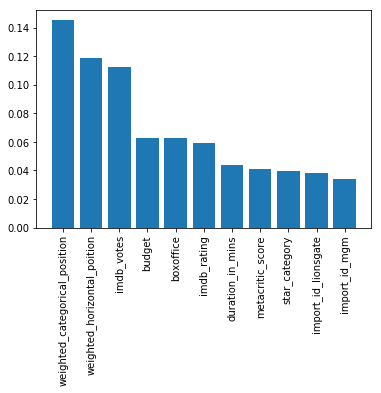

In [112]:
importances = rf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_best.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = tv_test_x.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")

for f in range(tv_test_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
    
plt.figure(1)
plt.bar(feature_name[:11], importances[indices[:11]])
plt.xticks(rotation=90)
plt.show()